1. Import Functions

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

2. Import Data



```
# **column explaination:**
"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"windspeed" - wind speed in km/h
"weathercode" - category of the weather
"isholiday" - boolean field - 1 holiday / 0 non holiday
"isweekend" - boolean field - 1 if the day is weekend
"sason" - category field meteorological seasons:
0-spring
1-summer
2-fall
3-winter
"weathe_code" - category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog
```



In [5]:
df=pd.read_csv("/content/london_bike_sharing_dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [8]:
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [9]:
df.tail(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [10]:
df.shape

(17414, 10)

3. Data Cleaning

In [11]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['date'] = pd.to_datetime(df['timestamp'])

4.Data Transformation & Manipulation

In [14]:
df.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [15]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [16]:
updated_columns={
    'timestamp':'time',
    'cnt':'count',
    't1':'temp_real_Celsius',
    't2':'temp_feels_like_Celsius',
    'hum':'humidity',
    'wind_speed': 'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}
df.rename(updated_columns, axis=1,inplace=True)

In [17]:
df.humidity = df.humidity / 100

In [18]:
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}


df.season = df.season.astype('str')
df.season = df.season.map(season_dict)
df.weather = df.weather.astype('str')
df.weather = df.weather.map(weather_dict)

In [19]:
df.head(5)

,time,count,temp_real_Celsius,temp_feels_like_Celsius,humidity,wind_speed_kph,weather,is_holiday,is_weekend,season,date
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,2015-01-04 00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,2015-01-04 01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,2015-01-04 02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,2015-01-04 03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,2015-01-04 04:00:00


In [20]:
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df.head(2)

,time,count,temp_real_Celsius,temp_feels_like_Celsius,humidity,wind_speed_kph,weather,is_holiday,is_weekend,season,date,day,month
0,2015-01-04 00:00:00,182,3.0,2.0,0.93,6.0,Broken clouds,0.0,1.0,winter,2015-01-04 00:00:00,Sunday,January
1,2015-01-04 01:00:00,138,3.0,2.5,0.93,5.0,Clear,0.0,1.0,winter,2015-01-04 01:00:00,Sunday,January


In [21]:
monthly_bike_share  = (df.groupby('day')['count'].sum()/1000000).round(1)
monthly_bike_share

day
Friday       2.9
Monday       2.8
Saturday     2.5
Sunday       2.4
Thursday     3.1
Tuesday      3.1
Wednesday    3.1
Name: count, dtype: float64

BIKE SHARE BY DAYS


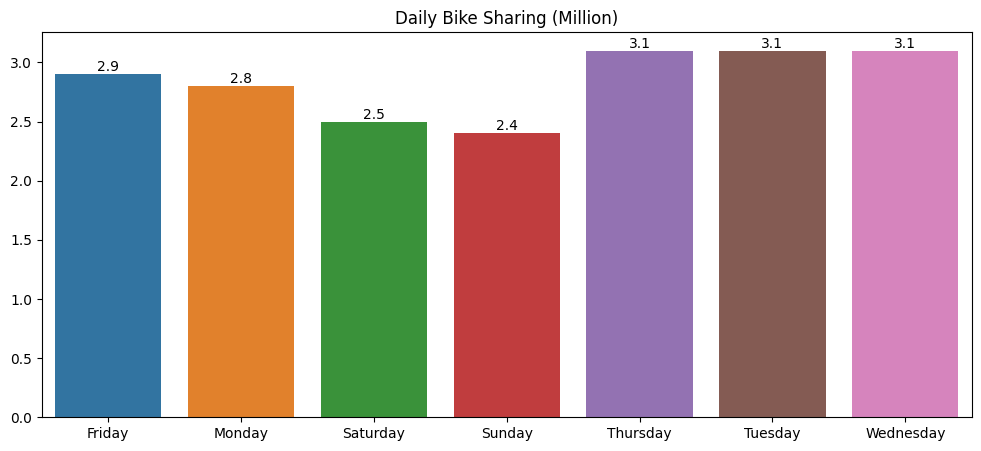

In [22]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Daily Bike Sharing (Million)")
ax.set_xlabel('')

for i in ax.containers:
    ax.bar_label(i)

BIKE SHARE BY MONTHS

In [23]:
monthly_bike_share  = (df.groupby('month')['count'].sum()/1000000).round(1)
monthly_bike_share

month
April        1.6
August       2.2
December     1.3
February     1.1
January      1.2
July         2.3
June         2.0
March        1.4
May          1.9
November     1.4
October      1.8
September    1.9
Name: count, dtype: float64

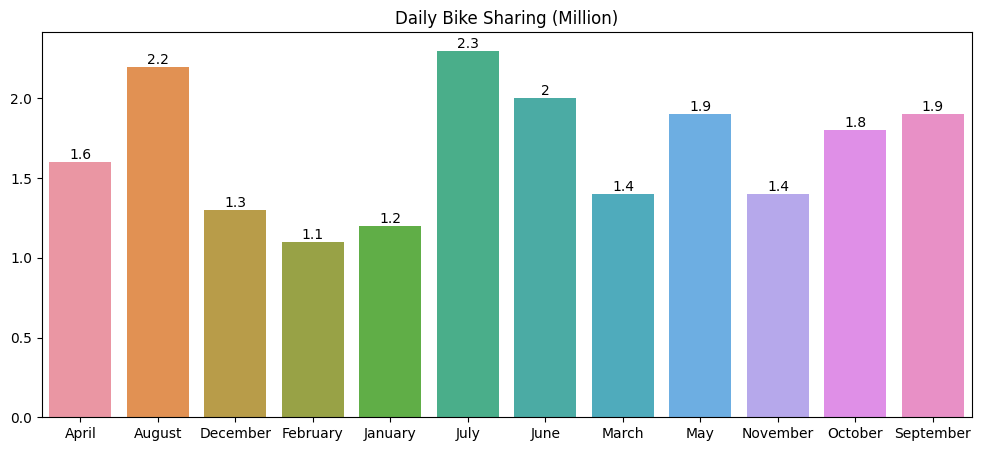

In [24]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Daily Bike Sharing (Million)")
ax.set_xlabel('')  # To cancel writing "month" on the x-axis

for i in ax.containers:
    ax.bar_label(i)

Bike usage by season, wheather, holiday and weekend

In [25]:
seasonally_bike_share  = (df.groupby('season')['count'].sum()/1000000).round(1)
seasonally_bike_share

season
autumn    5.1
spring    4.9
summer    6.4
winter    3.6
Name: count, dtype: float64

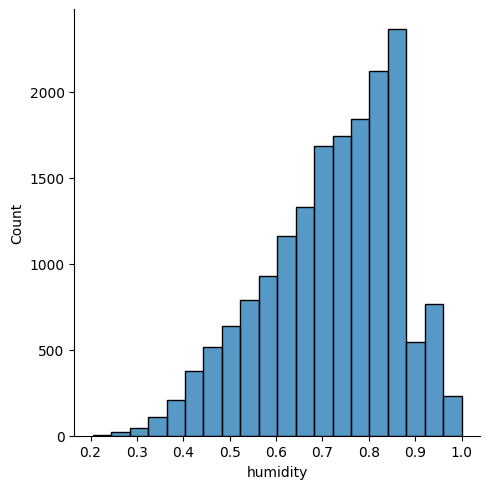

In [28]:
sns.displot(df['humidity'],bins=20)
plt.show()

histogram

<Axes: >

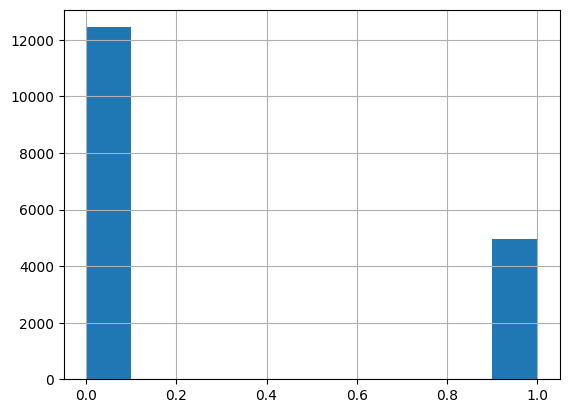

In [30]:
df['is_weekend'].hist()

<Axes: >

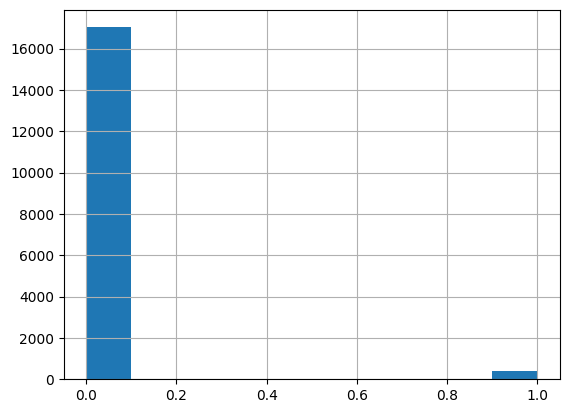

In [31]:
df['is_holiday'].hist()

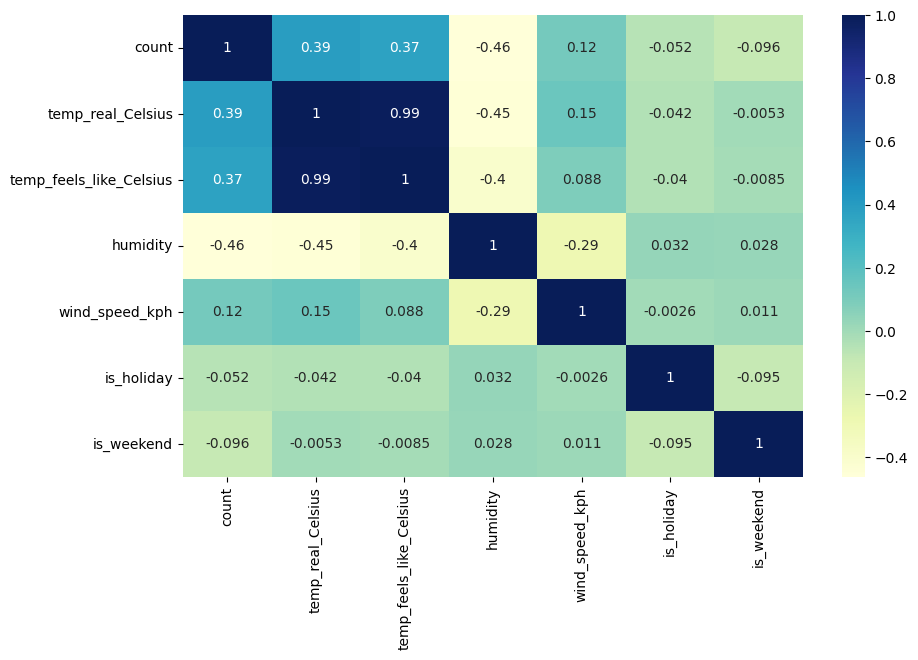

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes("number").corr(), cmap="YlGnBu", annot=True);